## TESLA Stock Price Prediction

1. Temel Regresyon Modelleri (Supervised Learning)

- Özellik Olarak Önceki Günlerin, Open, High, Low, Volume vb. değerleri alınır.
- Hedef Değişken olarak örneğin ertesi günün Close fiyatı kullanılır.

- LinearRegression
- Ridge / Lasso
- Random Forest Regressor
- Gradient Boost Regressor
- XGBoost
- MLPRegressor

2. Zaman Serisi Modelleri (Time Series Forecasting)

Close Sütununu kullanarak "gelecekteki fiyatı tahmin edebiliriz.

- ARIMA / SARIMA / SARIMAX
-> Tek değişkenli zaman serisi modelleridir.
- Exponential Smoothing 

3. Deep Learning Modelleri (LSTM, GRU, CNN)

Uzun vadeli ilişkiyi yakalamak için.

- LSTM (Long short-term memory)
- GRU (Gated Recurrent Unit)
- 1D CNN + LSTM hibrit modelleri

4. Clustering / Anomali Tespiti (Unsupervised)

- Kmeans ile benzer günleri gruplamak
- Anormal günleri (ani fiyat değişimleri) bulmak --> IsolationForest, OneClassSVM


Ertesi Gün Fiyat Tahmini   --> XGBoost, MLP, LSTM, ARIMA
Trend Analizi --> SARIMA
Uzun Dönem Tahmin --> LSTM, GRU
Anomali tespiti --> IsolationForest, Autoencoder

In [1]:
print("Project-7")

Project-7


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("TESLA.csv", parse_dates=["Date"])


In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800
...,...,...,...,...,...,...,...
248,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63615400
249,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900
250,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200
251,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800


In [7]:
df.sort_values("Date", inplace=True)

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800
...,...,...,...,...,...,...,...
248,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63615400
249,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900
250,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200
251,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800


In [9]:
df["Close_t"] = df["Close"].shift(1)

In [10]:
df["Close"]

0      260.436676
1      258.493347
2      258.406677
3      260.510010
4      260.196655
          ...    
248    275.329987
249    276.010010
250    282.940002
251    287.809998
252    268.209991
Name: Close, Length: 253, dtype: float64

In [12]:
df["Close"].shift(1)

0             NaN
1      260.436676
2      258.493347
3      258.406677
4      260.510010
          ...    
248    288.589996
249    275.329987
250    276.010010
251    282.940002
252    287.809998
Name: Close, Length: 253, dtype: float64

In [13]:
df["Open_t"] = df["Open"].shift(1)

In [14]:
df["Volume_t"] = df["Volume"].shift(1)

In [15]:
df = df.dropna()
X = df[["Close_t", "Open_t", "Volume_t"]]
y = df["Close"]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [17]:
X_train

,Close_t,Open_t,Volume_t
1,260.436676,259.933319,62828700.0
2,258.493347,260.333344,53868000.0
3,258.406677,259.466675,51094200.0
4,260.510010,265.500000,91449900.0
5,260.196655,261.600006,55297800.0
...,...,...,...
197,233.070007,236.846664,87930900.0
198,237.039993,225.500000,97954500.0
199,238.313339,234.896667,78557400.0
200,240.066666,240.000000,69683100.0


In [18]:
X_test

,Close_t,Open_t,Volume_t
202,245.529999,245.000000,80890200.0
203,247.500000,246.783340,88864200.0
204,271.706665,255.106674,142032300.0
205,272.243347,276.220001,103472700.0
206,268.433319,272.216675,64073400.0
207,258.859985,266.513336,66820800.0
208,274.820007,263.809998,88110000.0
209,280.899994,280.066681,84723000.0
210,297.149994,280.700012,95313000.0
211,297.276672,301.276672,117042900.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

MSE:  74.7516283405288
R2:  0.6276031618736769


In [26]:
df['Date'].iloc[-len(y_test):]

202   2022-07-20
203   2022-07-21
204   2022-07-22
205   2022-07-25
206   2022-07-26
207   2022-07-27
208   2022-07-28
209   2022-07-29
210   2022-08-01
211   2022-08-02
212   2022-08-03
213   2022-08-04
214   2022-08-05
215   2022-08-08
216   2022-08-09
217   2022-08-10
218   2022-08-11
219   2022-08-12
220   2022-08-15
221   2022-08-16
222   2022-08-17
223   2022-08-18
224   2022-08-19
225   2022-08-22
226   2022-08-23
227   2022-08-24
228   2022-08-25
229   2022-08-26
230   2022-08-29
231   2022-08-30
232   2022-08-31
233   2022-09-01
234   2022-09-02
235   2022-09-06
236   2022-09-07
237   2022-09-08
238   2022-09-09
239   2022-09-12
240   2022-09-13
241   2022-09-14
242   2022-09-15
243   2022-09-16
244   2022-09-19
245   2022-09-20
246   2022-09-21
247   2022-09-22
248   2022-09-23
249   2022-09-26
250   2022-09-27
251   2022-09-28
252   2022-09-29
Name: Date, dtype: datetime64[ns]

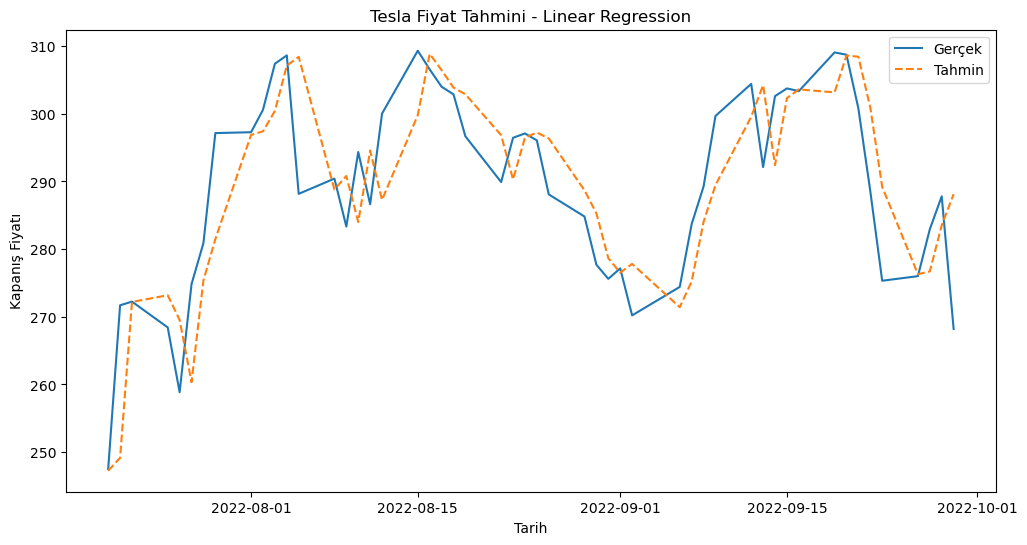

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[-len(y_test):], y_test.values, label="Gerçek")
plt.plot(df['Date'].iloc[-len(y_test):], y_pred_lr, label="Tahmin", linestyle = "--")
plt.title("Tesla Fiyat Tahmini - Linear Regression")
plt.xlabel("Tarih")
plt.ylabel("Kapanış Fiyatı")
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_rid = ridge.predict(X_test)

print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

MSE:  74.75214575242694
R2:  0.6276005842367858


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_las = lasso.predict(X_test)

print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

MSE:  74.7258398263158
R2:  0.6277316348095325


In [35]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=12)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("MSE: ", mean_squared_error(y_test, y_pred_rf))
print("R2: ", r2_score(y_test, y_pred_rf))

MSE:  121.15711102144581
R2:  0.39642083975254394


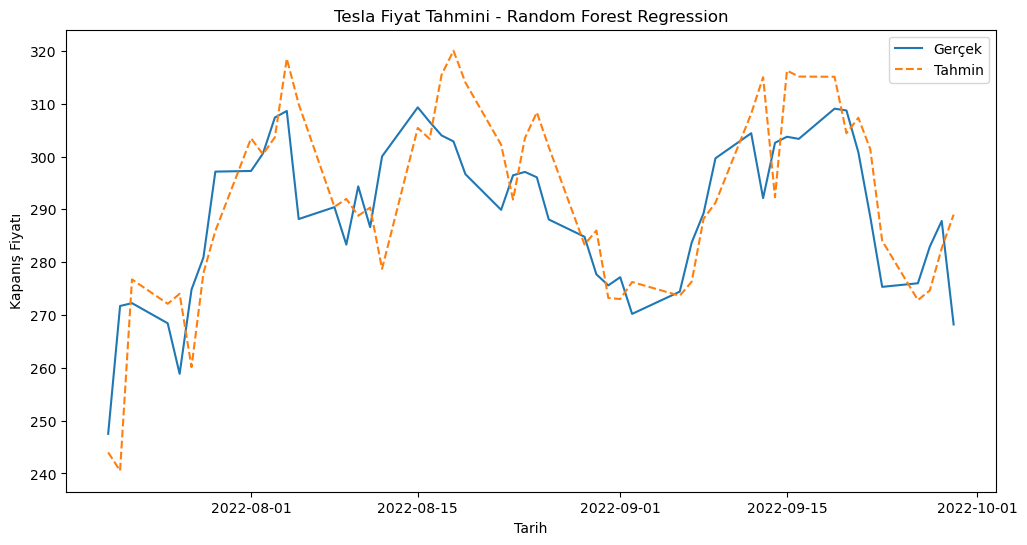

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[-len(y_test):], y_test.values, label="Gerçek")
plt.plot(df['Date'].iloc[-len(y_test):], y_pred_rf, label="Tahmin", linestyle = "--")
plt.title("Tesla Fiyat Tahmini - Random Forest Regression")
plt.xlabel("Tarih")
plt.ylabel("Kapanış Fiyatı")
plt.legend()
plt.show()

In [52]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=2000, random_state=42)
mlp.fit(X_train_scaled, y_train)

y_pred_mlp = mlp.predict(X_test_scaled)

print("MSE: ", mean_squared_error(y_test, y_pred_mlp))
print("R2: ", r2_score(y_test, y_pred_mlp))

MSE:  270.1308600222322
R2:  -0.3457349409749595


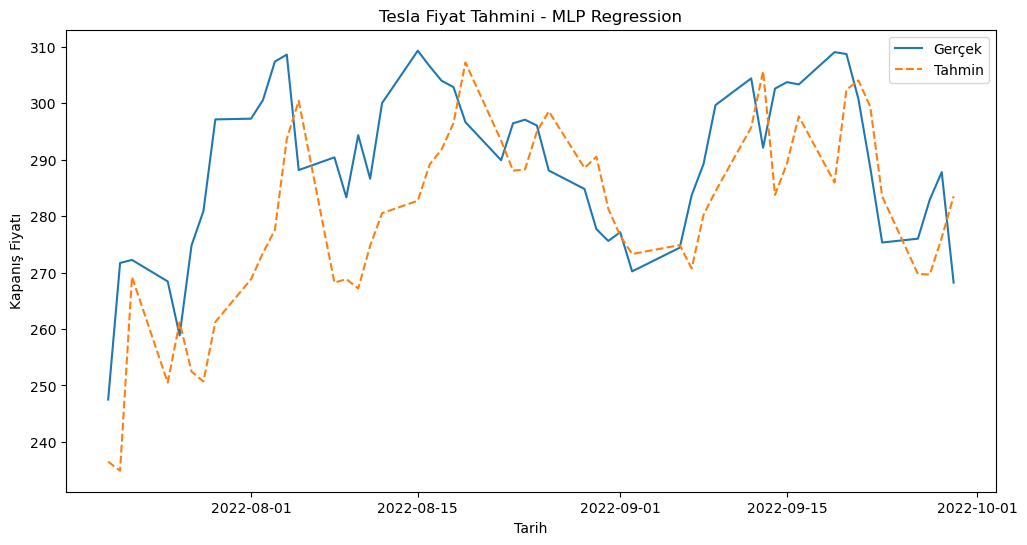

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[-len(y_test):], y_test.values, label="Gerçek")
plt.plot(df['Date'].iloc[-len(y_test):], y_pred_mlp, label="Tahmin", linestyle = "--")
plt.title("Tesla Fiyat Tahmini - MLP Regression")
plt.xlabel("Tarih")
plt.ylabel("Kapanış Fiyatı")
plt.legend()
plt.show()

### ÖDEV: ANN kurarak bir tahmin yapalım.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

###  NEXT: Aynı verileri tahmin etmek yerine Bir sonraki günün Close değerini tahmin edelim. LSTM, GRU

- 